In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/train_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89214 entries, 0 to 89213
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProductName                                        89213 non-null  object 
 1   EngineVersion                                      89214 non-null  object 
 2   AppVersion                                         89214 non-null  object 
 3   AvSigVersion                                       89214 non-null  object 
 4   RtpStateBitfield                                   88878 non-null  float64
 5   IsSxsPassiveMode                                   89214 non-null  int64  
 6   AVProductStatesIdentifier                          88849 non-null  float64
 7   AVProductsInstalled                                88849 non-null  float64
 8   AVProductsEnabled                                  88849 non-null  float64
 9   HasTpm

<AxesSubplot:>

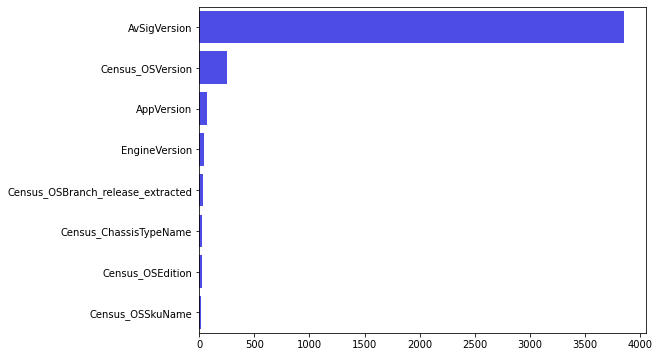

In [4]:
cat_col = df.select_dtypes('object').columns.tolist()
cardinality = df[cat_col].nunique().sort_values(ascending=False)
plt.figure(figsize=(8,6))
high_cardinality = cardinality[cardinality > 15]
sns.barplot(y=high_cardinality.index, 
            x=high_cardinality.values, 
            orient='h', 
            color='b', 
            alpha=.8)

In [5]:
for col in cat_col:
    print(f'Feature: {col} \nUnique Values Count: {df[col].nunique()}\nMissing Values Count: {df[col].isnull().sum()}\nValue counts:\n{df[col].value_counts()}\n\n')   

Feature: ProductName 
Unique Values Count: 2
Missing Values Count: 1
Value counts:
win8defender    88213
mse              1000
Name: ProductName, dtype: int64


Feature: EngineVersion 
Unique Values Count: 40
Missing Values Count: 0
Value counts:
1.1.15200.1    38090
1.1.15100.1    36948
1.1.15000.2     2605
1.1.14901.4     2230
1.1.14600.4     1564
1.1.14800.3     1374
1.1.15300.6     1239
1.1.14104.0      958
1.1.13504.0      755
1.1.15300.5      663
1.1.14700.5      487
1.1.14500.5      475
1.1.14405.2      377
1.1.14306.0      256
1.1.14202.0      173
1.1.14003.0      124
1.1.13407.0      100
1.1.13804.0       95
1.1.13303.0       95
1.1.13903.0       93
1.1.13601.0       64
1.1.12902.0       62
1.1.14305.0       56
1.1.13202.0       51
1.1.13000.0       49
1.1.13704.0       45
1.1.13103.0       41
1.1.13701.0       38
1.1.12805.0       29
1.1.15000.1       22
1.1.14700.3       15
1.1.14700.4       10
1.1.14901.3       10
1.1.14800.1        8
1.1.14201.0        3
1.1.14500.2       

Feature: Census_GenuineStateName 
Unique Values Count: 4
Missing Values Count: 0
Value counts:
IS_GENUINE         78801
INVALID_LICENSE     8001
OFFLINE             2260
UNKNOWN              152
Name: Census_GenuineStateName, dtype: int64


Feature: Census_ActivationChannel 
Unique Values Count: 6
Missing Values Count: 0
Value counts:
Retail            47401
OEM:DM            33979
Volume:GVLK        4510
OEM:NONSLP         3208
Volume:MAK           74
Retail:TB:Eval       42
Name: Census_ActivationChannel, dtype: int64


Feature: Census_FlightRing 
Unique Values Count: 7
Missing Values Count: 0
Value counts:
Retail      83497
NOT_SET      2903
Unknown      2442
WIF           111
RP            110
WIS           110
Disabled       41
Name: Census_FlightRing, dtype: int64


Feature: Census_OSBranch_release_extracted 
Unique Values Count: 36
Missing Values Count: 0
Value counts:
rs4_release                  38933
rs3_release_svc_escrow       12535
rs3_release                  11900
rs2_re

In [6]:
df['EngineVersion_encoded'] = [item[2] for item in df.EngineVersion.str.split('.')]
df[['EngineVersion','EngineVersion_encoded']]

,EngineVersion,EngineVersion_encoded
0,1.1.15200.1,15200
1,1.1.15100.1,15100
2,1.1.15200.1,15200
3,1.1.15100.1,15100
4,1.1.15100.1,15100
...,...,...
89209,1.1.15200.1,15200
89210,1.1.15200.1,15200
89211,1.1.14901.4,14901
89212,1.1.15200.1,15200


In [7]:
engine_ver_counts = pd.concat([df['EngineVersion_encoded'].value_counts(),
    df['EngineVersion_encoded'].value_counts()/len(df['EngineVersion_encoded'])], axis=1)
engine_ver_counts.columns=['Count', '%']
engine_ver_counts.head()

,Count,%
15200,38090,0.426951
15100,36948,0.414150
15000,2627,0.029446
14901,2240,0.025108
15300,1902,0.021320


In [8]:
df.loc[(df['EngineVersion_encoded'] != '15200') & (df['EngineVersion_encoded'] != '15100'),
       'EngineVersion_encoded'] = 'Other'
df['EngineVersion_encoded'].value_counts()/len(df['EngineVersion_encoded'])

15200    0.426951
15100    0.414150
Other    0.158899
Name: EngineVersion_encoded, dtype: float64

In [9]:
to_drop = []
to_drop.append('EngineVersion')

In [10]:
df.AppVersion.value_counts()

4.18.1807.18075    51203
4.18.1806.18062     8441
4.12.16299.15       3553
4.10.209.0          2874
4.13.17134.1        2642
                   ...  
4.5.216.0              1
4.17.17682.1000        1
4.15.17661.1001        1
4.17.17672.1000        1
4.17.17677.1000        1
Name: AppVersion, Length: 73, dtype: int64

In [11]:
sum(~df.AppVersion.str.startswith('4'))

0

In [12]:
df['AppVersion_encoded'] = [item[1] for item in df.AppVersion.str.split('.')]
df[['AppVersion','AppVersion_encoded']]

,AppVersion,AppVersion_encoded
0,4.18.1807.18075,18
1,4.18.1806.18062,18
2,4.18.1807.18075,18
3,4.9.10586.0,9
4,4.18.1807.18075,18
...,...,...
89209,4.18.1807.18075,18
89210,4.18.1807.18075,18
89211,4.16.17656.18052,16
89212,4.18.1807.18075,18


In [13]:
app_ver_counts = pd.concat([df['AppVersion_encoded'].value_counts(),
    df['AppVersion_encoded'].value_counts()/len(df['AppVersion_encoded'])], axis=1)
app_ver_counts.columns=['Count', '%']
app_ver_counts.head(10)

,Count,%
18,59803,0.670332
12,5456,0.061156
13,5175,0.058007
10,4772,0.053489
9,4252,0.047661
8,2757,0.030903
14,2520,0.028247
16,2328,0.026095
11,2098,0.023516
5,20,0.000224


In [14]:
df.loc[df['AppVersion_encoded'] != '18', 'AppVersion_encoded'] = 'Other'
df['AppVersion_encoded'].value_counts()/len(df['AppVersion_encoded'])

18       0.670332
Other    0.329668
Name: AppVersion_encoded, dtype: float64

In [15]:
to_drop.append('AppVersion')

In [16]:
df.AvSigVersion.value_counts()

1.273.1420.0    1015
1.263.48.0       977
1.275.727.0      969
1.275.1140.0     928
1.273.1826.0     922
                ... 
1.261.590.0        1
1.261.844.0        1
1.263.492.0        1
1.263.299.0        1
1.231.1570.0       1
Name: AvSigVersion, Length: 3857, dtype: int64

In [17]:
sum(~df.AvSigVersion.str.startswith('1'))

1

In [18]:
df['AvSigVersion'][~df.AvSigVersion.str.startswith('1')]

35945    0.0.0.0
Name: AvSigVersion, dtype: object

In [19]:
idx = df[df.AvSigVersion == '0.0.0.0'].index
df.drop(idx, inplace=True)

In [20]:
df['AvSigVersion_encoded'] = [item[1] for item in df.AvSigVersion.str.split('.')]
df[['AvSigVersion','AvSigVersion_encoded']]

,AvSigVersion,AvSigVersion_encoded
0,1.275.1140.0,275
1,1.273.371.0,273
2,1.275.1105.0,275
3,1.273.1405.0,273
4,1.273.1208.0,273
...,...,...
89209,1.275.388.0,275
89210,1.275.1733.0,275
89211,1.269.521.0,269
89212,1.275.1417.0,275


In [21]:
av_sig_ver = pd.concat([df['AvSigVersion_encoded'].value_counts(),
    df['AvSigVersion_encoded'].value_counts()/len(df['AvSigVersion_encoded'])], axis=1)
av_sig_ver.columns=['Count', '%']
av_sig_ver.head(30)

,Count,%
275,38628,0.432986
273,37432,0.419580
271,2657,0.029783
269,2253,0.025254
263,1561,0.017497
267,1385,0.015525
251,959,0.010750
277,819,0.009180
237,753,0.008440
261,508,0.005694


In [22]:
df.loc[(df['AvSigVersion_encoded'] != '275') & (df['AvSigVersion_encoded'] != '273'),
       'AvSigVersion_encoded'] = 'Other'
df['AvSigVersion_encoded'].value_counts()/len(df['AvSigVersion_encoded'])

275      0.432986
273      0.419580
Other    0.147434
Name: AvSigVersion_encoded, dtype: float64

In [23]:
to_drop.append('AvSigVersion')

In [24]:
df.OsVer.value_counts()

10.0.0.0    86181
6.3.0.0      2040
6.1.1.0       992
Name: OsVer, dtype: int64

In [25]:
df['OsVer_encoded'] = np.where(df.OsVer == '10.0.0.0', 1, 0)
df['OsVer_encoded'].value_counts()

1    86181
0     3032
Name: OsVer_encoded, dtype: int64

In [26]:
to_drop.append('OsVer')

In [27]:
df.Census_OSVersion.value_counts()

10.0.17134.228      14058
10.0.17134.165       8879
10.0.16299.431       5484
10.0.17134.285       4710
10.0.16299.547       3462
                    ...  
10.0.15063.242          1
10.0.17666.1000         1
10.0.14366.0            1
10.0.10240.16387        1
10.0.17661.1001         1
Name: Census_OSVersion, Length: 252, dtype: int64

In [28]:
sum(~df.Census_OSVersion.str.startswith('10'))

1

In [29]:
df['Census_OSVersion'][~df.Census_OSVersion.str.startswith('10')]

69124    6.3.9600.18756
Name: Census_OSVersion, dtype: object

In [30]:
idx = df[df.Census_OSVersion == '6.3.9600.18756'].index
df.drop(idx, inplace=True)

In [31]:
Counter([item[0] for item in df.Census_OSVersion.str.split('.')])

Counter({'10': 89212})

In [32]:
Counter([item[1] for item in df.Census_OSVersion.str.split('.')])

Counter({'0': 89212})

In [33]:
Counter([item[2] for item in df.Census_OSVersion.str.split('.')])

Counter({'17134': 39863,
         '10586': 6124,
         '16299': 24425,
         '15063': 7948,
         '14393': 7883,
         '10240': 2727,
         '17755': 9,
         '17733': 6,
         '17692': 35,
         '17758': 20,
         '17682': 5,
         '17133': 8,
         '17744': 36,
         '14372': 1,
         '17723': 1,
         '17741': 14,
         '17751': 8,
         '17738': 29,
         '17677': 3,
         '17661': 1,
         '18234': 2,
         '17763': 13,
         '17686': 6,
         '17746': 9,
         '17713': 2,
         '18237': 4,
         '17754': 11,
         '17760': 5,
         '17735': 5,
         '17666': 1,
         '14385': 1,
         '16257': 1,
         '14366': 1,
         '18242': 3,
         '17747': 1,
         '10565': 1})

In [34]:
df['Census_OSVersion_encoded'] = [item[2] for item in df.Census_OSVersion.str.split('.')]
df[['Census_OSVersion', 'Census_OSVersion_encoded']]

,Census_OSVersion,Census_OSVersion_encoded
0,10.0.17134.285,17134
1,10.0.17134.165,17134
2,10.0.17134.228,17134
3,10.0.10586.0,10586
4,10.0.17134.48,17134
...,...,...
89209,10.0.16299.248,16299
89210,10.0.16299.431,16299
89211,10.0.17134.81,17134
89212,10.0.17134.285,17134


In [35]:
census_os_ver = pd.concat([df['Census_OSVersion_encoded'].value_counts(),
    df['Census_OSVersion_encoded'].value_counts()/len(df['Census_OSVersion_encoded'])], axis=1)
census_os_ver.columns=['Count', '%']
census_os_ver.head(30)

,Count,%
17134,39863,0.446835
16299,24425,0.273786
15063,7948,0.089091
14393,7883,0.088363
10586,6124,0.068645
10240,2727,0.030568
17744,36,0.000404
17692,35,0.000392
17738,29,0.000325
17758,20,0.000224


In [36]:
other_os = ~df['Census_OSVersion_encoded'].isin(['17134', 
                                                 '16299', 
                                                 '15063', 
                                                 '14393', 
                                                 '10586', 
                                                 '10240'])
df.loc[other_os, 'Census_OSVersion_encoded'] = 'Other'
df['Census_OSVersion_encoded'].value_counts()/len(df['Census_OSVersion_encoded'])

17134    0.446835
16299    0.273786
15063    0.089091
14393    0.088363
10586    0.068645
10240    0.030568
Other    0.002713
Name: Census_OSVersion_encoded, dtype: float64

In [37]:
to_drop.append('Census_OSVersion')

In [38]:
df.drop(to_drop, axis=1, inplace=True)
df.shape

(89212, 66)

In [39]:
cat_col = df.select_dtypes('object').columns.tolist()
high_card_col = [col for col in cat_col if df[col].nunique()>15]
high_card_col 

['Census_ChassisTypeName',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSBranch_release_extracted']

In [40]:
for col in high_card_col:
    print(f'Feature: {col} \nUnique Values Count: {df[col].nunique()}\nMissing Values Count: {df[col].isnull().sum()}\nValue counts:\n{df[col].value_counts()}\n\n')

Feature: Census_ChassisTypeName 
Unique Values Count: 27
Missing Values Count: 3
Value counts:
Notebook               52541
Desktop                18770
Laptop                  6906
Portable                3498
AllinOne                2049
MiniTower                850
Convertible              844
Unknown                  798
Other                    756
Detachable               507
LowProfileDesktop        453
HandHeld                 444
SpaceSaving              309
Tablet                   136
Tower                    116
MainServerChassis         97
MiniPC                    48
LunchBox                  39
RackMountChassis          27
SubNotebook                6
BusExpansionChassis        6
30                         4
SubChassis                 1
81                         1
127                        1
IoTGateway                 1
0                          1
Name: Census_ChassisTypeName, dtype: int64


Feature: Census_OSEdition 
Unique Values Count: 21
Missing Values Count: 0
Va

In [41]:
census_chassis = pd.concat([df['Census_ChassisTypeName'].value_counts(),
    df['Census_ChassisTypeName'].value_counts()/len(df['Census_ChassisTypeName'])], axis=1)
census_chassis.columns=['Count', '%']
census_chassis.head(30)

,Count,%
Notebook,52541,0.588945
Desktop,18770,0.210398
Laptop,6906,0.077411
Portable,3498,0.039210
AllinOne,2049,0.022968
MiniTower,850,0.009528
Convertible,844,0.009461
Unknown,798,0.008945
Other,756,0.008474
Detachable,507,0.005683


In [42]:
other_chassis = ~df['Census_ChassisTypeName'].isin(['Notebook', 
                                                    'Desktop', 
                                                    'Laptop'])
df.loc[other_chassis, 'Census_ChassisTypeName'] = 'Other'
df['Census_ChassisTypeName'].value_counts()/len(df['Census_ChassisTypeName'])

Notebook    0.588945
Desktop     0.210398
Other       0.123246
Laptop      0.077411
Name: Census_ChassisTypeName, dtype: float64

In [43]:
census_os_edition = pd.concat([df['Census_OSEdition'].value_counts(),
    df['Census_OSEdition'].value_counts()/len(df['Census_OSEdition'])], axis=1)
census_os_edition.columns=['Count', '%']
census_os_edition.head(30)

,Count,%
Core,34779,0.389847
Professional,31158,0.349258
CoreSingleLanguage,19483,0.218390
CoreCountrySpecific,1677,0.018798
ProfessionalEducation,565,0.006333
Education,438,0.004910
Enterprise,367,0.004114
ProfessionalN,292,0.003273
EnterpriseS,206,0.002309
ServerStandard,89,0.000998


In [44]:
other_os_edition = ~df['Census_OSEdition'].isin(['Core',
                                                'Professional',
                                                'CoreSingleLanguage'])
df.loc[other_os_edition, 'Census_OSEdition'] = 'Other'
df['Census_OSEdition'].value_counts()/len(df['Census_OSEdition'])

Core                  0.389847
Professional          0.349258
CoreSingleLanguage    0.218390
Other                 0.042505
Name: Census_OSEdition, dtype: float64

In [45]:
census_os_sku = pd.concat([df['Census_OSSkuName'].value_counts(),
    df['Census_OSSkuName'].value_counts()/len(df['Census_OSSkuName'])], axis=1)
census_os_sku.columns=['Count', '%']
census_os_sku.head(30)

,Count,%
CORE,34771,0.389757
PROFESSIONAL,31736,0.355737
CORE_SINGLELANGUAGE,19480,0.218356
CORE_COUNTRYSPECIFIC,1675,0.018776
EDUCATION,438,0.004910
ENTERPRISE,366,0.004103
PROFESSIONAL_N,294,0.003296
ENTERPRISE_S,206,0.002309
STANDARD_SERVER,89,0.000998
CLOUD,58,0.000650


In [46]:
other_os_sku = ~df['Census_OSSkuName'].isin(['CORE',
                                            'PROFESSIONAL',
                                            'CORE_SINGLELANGUAGE'])
df.loc[other_os_sku, 'Census_OSSkuName'] = 'Other'
df['Census_OSSkuName'].value_counts()/len(df['Census_OSSkuName'])

CORE                   0.389757
PROFESSIONAL           0.355737
CORE_SINGLELANGUAGE    0.218356
Other                  0.036150
Name: Census_OSSkuName, dtype: float64

In [47]:
census_os_release = pd.concat([df['Census_OSBranch_release_extracted'].value_counts(),
    df['Census_OSBranch_release_extracted'].value_counts()/len(df['Census_OSBranch_release_extracted'])], axis=1)
census_os_release.columns=['Count', '%']
census_os_release.head(30)

,Count,%
rs4_release,38931,0.436387
rs3_release_svc_escrow,12535,0.140508
rs3_release,11900,0.133390
rs2_release,7790,0.087320
rs1_release,5328,0.059723
th2_release_sec,2927,0.032809
th1,2522,0.028270
winblue_ltsb_escrow,1412,0.015827
th2_release,1232,0.013810
rs1_release_inmarket,1091,0.012229


In [48]:
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs1', regex=False), 'Census_OSBranch_release_extracted'] = 'rs1_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs2', regex=False), 'Census_OSBranch_release_extracted'] = 'rs2_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs3', regex=False), 'Census_OSBranch_release_extracted'] = 'rs3_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs4', regex=False), 'Census_OSBranch_release_extracted'] = 'rs4_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs5', regex=False), 'Census_OSBranch_release_extracted'] = 'rs5_release'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('win', regex=False), 'Census_OSBranch_release_extracted'] = 'win'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('th2', regex=False), 'Census_OSBranch_release_extracted'] = 'th'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('th1', regex=False), 'Census_OSBranch_release_extracted'] = 'th'
df.loc[df['Census_OSBranch_release_extracted'].str.contains('rs_pre', regex=False), 'Census_OSBranch_release_extracted'] = 'rs_prerelease'

df['Census_OSBranch_release_extracted'].value_counts()/df.shape[0]

rs4_release      0.436387
rs3_release      0.280422
rs2_release      0.087320
rs1_release      0.081895
th               0.077411
win              0.033986
rs5_release      0.001850
rs_prerelease    0.000729
Name: Census_OSBranch_release_extracted, dtype: float64

In [49]:
other_os_branch = ~df['Census_OSBranch_release_extracted'].isin(['rs4_release',
                                                                 'rs3_release',
                                                                 'rs2_release',
                                                                 'rs1_release',
                                                                 'th'
                                                                ])
df.loc[other_os_branch, 'Census_OSBranch_release_extracted'] = 'Other'
df['Census_OSBranch_release_extracted'].value_counts()/len(df['Census_OSBranch_release_extracted'])

rs4_release    0.436387
rs3_release    0.280422
rs2_release    0.087320
rs1_release    0.081895
th             0.077411
Other          0.036565
Name: Census_OSBranch_release_extracted, dtype: float64

In [50]:
df.to_csv('../data/interim/train_clean_roll_up.csv', index = False)

In [51]:
df.shape

(89212, 66)